# (2011-2019 College Enrollment Headcount Data in New York - Communicate Data Findings)
## by (Muhammad Megahed)

## Project Description:

> * In this project i will be scraping a csv file from data.gov.
> * That csv contains the enrollment info of full-time and part-time of both undergrad and grad students from 2011 to 2019.
> * I will analyze the data of 2011 and 2019 and provide highlights
> * I will also analyze the data of all the years together and provide highlights.

## Questions:

#### In each of the following: 
> 1. 2011
> 2. 2019
> 3. The period between (2011 and 2019)
#### answer the following questions:
> * What was the record of the highest and lowest number of enrollments in undergraduate full-time students and where was it?
> * What was the record of the highest and lowest number of enrollments in undergraduate part-time students and where was it?
> * What was the record of the highest and lowest number of enrollments in graduate full-time students and where was it?
> * What was the record of the highest and lowest number of enrollments in graduate part-time students and where was it?
> * Who holds the top 10 in each category?


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Part 1: Web Scraping


> * I use beautifulsoup to scrape data.gov up to the point of finding the exact link for the csv file rquired.

In [736]:
import requests
from bs4 import BeautifulSoup
import lxml

### 1. Searching data.gov for datasets in csv files

In [740]:
html_text = requests.get('http://catalog.data.gov/dataset?res_format=CSV&page=1').text
soup = BeautifulSoup(html_text, 'lxml')

### 2. Printing out total findings

In [741]:
Total_findings = soup.find('div', class_ = "new-results")
print(Total_findings.text.replace('\n', ''))

                24,491 datasets found        


### 3. Printing out headlines.

In [743]:
topics = soup.find_all('h3', class_='dataset-heading')
for topic in topics:
    print(f'{topic.text}')


2006 - 2011 NYS Math Test Results by Grade - Citywide - by Race-Ethnicity


2010-2011 Class Size - District-level Summary


2010-2011 Class Size - Borough Summary


Appeals Filed In 2017


Expense Actuals


Capital Grant Awards 2016


CMS: LiDAR Data for Forested Areas in Paragominas, Para, Brazil, 2012-2014


RapidScat Level 2B Ocean Wind Vectors in 12.5km Slice Composites Version 1.1


Homes and Community Renewal Grant Awards:  Beginning 1990


Headcount Enrollment by Student Level and Student Load by Institutions of the State University of New York: Beginning Fall 2011


Selected Scholarship Programs by Metric Type: Beginning 2014


Waterbody Classifications


Procurement Report for Local Authorities


New York State Enacted Budget Capital Appropriations: 2017-2018


Commercial and Non Commercial Flights per Month, Port Authority of NY NJ: Beginning 1977


NYC Transit Subway Entrance And Exit Data


State Liquor Authority (SLA) Alcoholic Beverage Wet and Dry Local Options: Beginnin

### 4. Picking desired dataset.

In [747]:
for topic in topics:
    if 'Headcount' in topic.text:
        print(topic.text)
        link = topic.a['href']


Headcount Enrollment by Student Level and Student Load by Institutions of the State University of New York: Beginning Fall 2011



In [748]:
dataset_link = 'http://catalog.data.gov/' + link
html2_text = requests.get(dataset_link).text
soup2 = BeautifulSoup(html2_text, 'lxml')

In [749]:
csv = soup2.find_all('a', class_ = 'btn btn-primary')
for c in csv:
    if 'csv' in c['href']:
        csv_file = c['href']

In [750]:
csv_file

'https://data.ny.gov/api/views/4fyc-bf8i/rows.csv?accessType=DOWNLOAD'

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Part 2 & 3: Using NumPy & Pandas for data combining and merging.

In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> * Just in case, the data file can be downloaded from the following link:
> * https://data.ny.gov/api/views/4fyc-bf8i/rows.csv?accessType=DOWNLOAD

In [751]:
# importing the csv file from the link with pandas.

#df = pd.read_csv("Headcount_Enrollment_New_York__Beginning_Fall_2011.csv")
df = pd.read_csv(csv_file)

In [752]:
# a general look on the first few rows of the dataframe
df.head()

,Year,Term,College or Institution Type,College or Institution Name,Undergraduate Full-Time,Undergraduate Part-Time,Graduate Full-Time,Graduate Part-Time
0,2019,Fall,Community Colleges,Adirondack,1905.0,1515.0,NaN,NaN
1,2018,Fall,Community Colleges,Adirondack,2090.0,1637.0,NaN,NaN
2,2017,Fall,Community Colleges,Adirondack,2189.0,1703.0,NaN,NaN
3,2016,Fall,Community Colleges,Adirondack,2156.0,1620.0,NaN,NaN
4,2015,Fall,Community Colleges,Adirondack,2294.0,1699.0,NaN,NaN


In [753]:
# General info shows that we have a lot of null values in the columns with a float64 data type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         549 non-null    int64  
 1   Term                         549 non-null    object 
 2   College or Institution Type  549 non-null    object 
 3   College or Institution Name  549 non-null    object 
 4   Undergraduate Full-Time      540 non-null    float64
 5   Undergraduate Part-Time      532 non-null    float64
 6   Graduate Full-Time           242 non-null    float64
 7   Graduate Part-Time           230 non-null    float64
dtypes: float64(4), int64(1), object(3)
memory usage: 34.4+ KB


In [754]:
# general comuptations of the dataframe including mean, min, max and standard deviation.
df.describe()

,Year,Undergraduate Full-Time,Undergraduate Part-Time,Graduate Full-Time,Graduate Part-Time
count,549.000000,540.000000,532.000000,242.000000,230.000000
mean,2015.000000,4709.988889,2038.225564,905.590909,642.973913
std,2.584344,3949.670420,2380.417802,1547.279804,921.366400
min,2011.000000,153.000000,1.000000,1.000000,0.000000
25%,2013.000000,1966.500000,386.250000,120.000000,79.250000
50%,2015.000000,3584.500000,1117.500000,255.500000,221.500000
75%,2017.000000,6206.750000,2887.250000,1053.500000,706.250000
max,2019.000000,20401.000000,12982.000000,6725.000000,3691.000000


In [755]:
# sorting the dataframe with the 'Year' column
df = df.sort_values('Year')

In [756]:
# creating a new index counting from 0 to 549 and moving the original index into the columns
df = df.reset_index()

In [757]:
df.head()

,index,Year,Term,College or Institution Type,College or Institution Name,Undergraduate Full-Time,Undergraduate Part-Time,Graduate Full-Time,Graduate Part-Time
0,548,2011,Fall,Community Colleges,Westchester,7410.0,6559.0,NaN,NaN
1,161,2011,Fall,Technology Colleges,Delhi,2607.0,642.0,NaN,NaN
2,62,2011,Fall,Community Colleges,Broome,4376.0,1824.0,NaN,NaN
3,377,2011,Fall,Community Colleges,North Country,1124.0,1330.0,NaN,NaN
4,170,2011,Fall,Doctoral Degree Granting Institutions,Downstate Medical,184.0,165.0,1037.0,365.0


In [758]:
# renaming the index column to 'entry#' for future use
df = df.rename(columns = {'index': 'entry#'})

In [759]:
df.head()

,entry#,Year,Term,College or Institution Type,College or Institution Name,Undergraduate Full-Time,Undergraduate Part-Time,Graduate Full-Time,Graduate Part-Time
0,548,2011,Fall,Community Colleges,Westchester,7410.0,6559.0,NaN,NaN
1,161,2011,Fall,Technology Colleges,Delhi,2607.0,642.0,NaN,NaN
2,62,2011,Fall,Community Colleges,Broome,4376.0,1824.0,NaN,NaN
3,377,2011,Fall,Community Colleges,North Country,1124.0,1330.0,NaN,NaN
4,170,2011,Fall,Doctoral Degree Granting Institutions,Downstate Medical,184.0,165.0,1037.0,365.0


In [760]:
# checking data types of columns
df.dtypes

entry#                           int64
Year                             int64
Term                            object
College or Institution Type     object
College or Institution Name     object
Undergraduate Full-Time        float64
Undergraduate Part-Time        float64
Graduate Full-Time             float64
Graduate Part-Time             float64
dtype: object

In [761]:
# replacing Null values with 0
df = df.fillna('0')

In [762]:
# Creating a dataframe of each year's data

df_2011 = pd.DataFrame(df.loc[df['Year'] == 2011])

df_2012 = pd.DataFrame(df.loc[df['Year'] == 2012])

df_2013 = pd.DataFrame(df.loc[df['Year'] == 2013])

df_2014 = pd.DataFrame(df.loc[df['Year'] == 2014])

df_2015 = pd.DataFrame(df.loc[df['Year'] == 2015])

df_2016 = pd.DataFrame(df.loc[df['Year'] == 2016])

df_2017 = pd.DataFrame(df.loc[df['Year'] == 2017])

df_2018 = pd.DataFrame(df.loc[df['Year'] == 2018])

df_2019 = pd.DataFrame(df.loc[df['Year'] == 2019])

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Part 4a: Data Aggregation Highlight

---
---
---
###  1. Analyzing data in the first year 2011

In [763]:
df_2011.head()

,entry#,Year,Term,College or Institution Type,College or Institution Name,Undergraduate Full-Time,Undergraduate Part-Time,Graduate Full-Time,Graduate Part-Time
0,548,2011,Fall,Community Colleges,Westchester,7410,6559,0,0
1,161,2011,Fall,Technology Colleges,Delhi,2607,642,0,0
2,62,2011,Fall,Community Colleges,Broome,4376,1824,0,0
3,377,2011,Fall,Community Colleges,North Country,1124,1330,0,0
4,170,2011,Fall,Doctoral Degree Granting Institutions,Downstate Medical,184,165,1037,365


In [764]:
# checking data types in new dataframe
df_2011.dtypes

entry#                          int64
Year                            int64
Term                           object
College or Institution Type    object
College or Institution Name    object
Undergraduate Full-Time        object
Undergraduate Part-Time        object
Graduate Full-Time             object
Graduate Part-Time             object
dtype: object

In [765]:
# changing object data types to numeric
df_2011['Undergraduate Full-Time']= pd.to_numeric(df_2011['Undergraduate Full-Time'],errors='coerce')
df_2011['Undergraduate Part-Time']= pd.to_numeric(df_2011['Undergraduate Part-Time'],errors='coerce')
df_2011['Graduate Full-Time']= pd.to_numeric(df_2011['Graduate Full-Time'],errors='coerce')
df_2011['Graduate Part-Time']= pd.to_numeric(df_2011['Graduate Part-Time'],errors='coerce')

In [766]:
# converting the undergrad and grad columns into NumPy arrays to analyze
undergrad_full_2011 = df_2011['Undergraduate Full-Time'].to_numpy(dtype = 'float64')
undergrad_part_2011 = df_2011['Undergraduate Part-Time'].to_numpy(dtype = 'float64')
grad_full_2011 = df_2011['Graduate Full-Time'].to_numpy(dtype = 'float64')
grad_part_2011 = df_2011['Graduate Part-Time'].to_numpy(dtype = 'float64')

In [767]:
# finding the maximum undergraduate full-timers in 2011
max_undergrad_full_2011 = np.where(undergrad_full_2011 == np.amax(undergrad_full_2011))[0][0]

# finding the maximum undergraduate part-timers in 2011
max_undergrad_part_2011 = np.where(undergrad_part_2011 == np.amax(undergrad_part_2011))[0][0]

# finding the maximum graduate full-timers in 2011
max_grad_full_2011 = np.where(grad_full_2011 == np.amax(grad_full_2011))[0][0]

# finding the maximum graduate part-timers in 2011
max_grad_part_2011 = np.where(grad_part_2011 == np.amax(grad_part_2011))[0][0]

# finding the minimum undergraduate full-timers in 2011
undergrad_full_2011_min = df_2011[ df_2011['Undergraduate Full-Time'] != 0]
undergrad_full_2011_min = undergrad_full_2011_min['Undergraduate Full-Time'].to_numpy(dtype = 'float64')
min_undergrad_full_2011 = np.where(undergrad_full_2011_min == np.amin(undergrad_full_2011_min))[0][0]

# finding the minimum undergraduate part-timers in 2011
undergrad_part_2011_min = df_2011[ df_2011['Undergraduate Part-Time'] != 0]
undergrad_part_2011_min = undergrad_part_2011_min['Undergraduate Part-Time'].to_numpy(dtype = 'float64')
min_undergrad_part_2011 = df_2011.loc[df_2011['Undergraduate Part-Time'] == undergrad_part_2011_min.min()]
min_undergrad_part_2011 = min_undergrad_part_2011.iloc[0]

# finding the minimum graduate full-timers in 2011
grad_full_2011_min = df_2011[ df_2011['Graduate Full-Time'] != 0]
grad_full_2011_min = grad_full_2011_min['Graduate Full-Time'].to_numpy(dtype = 'float64')
min_grad_full_2011 = df_2011.loc[df_2011['Graduate Full-Time'] == grad_full_2011_min.min()]
min_grad_full_2011 = min_grad_full_2011.iloc[0]

# finding the minimum graduate part-timers in 2011
grad_part_2011_min = df_2011[ df_2011['Graduate Part-Time'] != 0]
grad_part_2011_min = grad_part_2011_min['Graduate Part-Time'].to_numpy(dtype = 'float64')
min_grad_part_2011 = df_2011.loc[df_2011['Graduate Part-Time'] == grad_part_2011_min.min()]
min_grad_part_2011 = min_grad_part_2011.iloc[0]


In [768]:
## creating variables for writing conclusion
max_ug_f = df_2011.iloc[max_undergrad_full_2011]['Undergraduate Full-Time']
max_ug_f_cn = df_2011.iloc[max_undergrad_full_2011]['College or Institution Name']
max_ug_f_ct = df_2011.iloc[max_undergrad_full_2011]['College or Institution Type']

max_ug_p = df_2011.iloc[max_undergrad_part_2011]['Undergraduate Part-Time']
max_ug_p_cn = df_2011.iloc[max_undergrad_part_2011]['College or Institution Name']
max_ug_p_ct = df_2011.iloc[max_undergrad_part_2011]['College or Institution Type']

max_g_f = df_2011.iloc[max_grad_full_2011]['Graduate Full-Time']
max_g_f_cn = df_2011.iloc[max_grad_full_2011]['College or Institution Name']
max_g_f_ct = df_2011.iloc[max_grad_full_2011]['College or Institution Type']

max_g_p = df_2011.iloc[max_grad_part_2011]['Graduate Part-Time']
max_g_p_cn = df_2011.iloc[max_grad_part_2011]['College or Institution Name']
max_g_p_ct = df_2011.iloc[max_grad_part_2011]['College or Institution Type']

min_ug_f = df_2011.iloc[min_undergrad_full_2011]['Undergraduate Full-Time'] 
min_ug_f_cn = df_2011.iloc[min_undergrad_full_2011]['College or Institution Name']
min_ug_f_ct = df_2011.iloc[min_undergrad_full_2011]['College or Institution Type']

min_ug_p = min_undergrad_part_2011['Undergraduate Part-Time'] 
min_ug_p_cn = min_undergrad_part_2011['College or Institution Name']
min_ug_p_ct = min_undergrad_part_2011['College or Institution Type']

min_g_f = min_grad_full_2011['Graduate Full-Time']
min_g_f_cn = min_grad_full_2011['College or Institution Name']
min_g_f_ct = min_grad_full_2011['College or Institution Type']

min_g_p = min_grad_part_2011['Graduate Part-Time'] 
min_g_p_cn = min_grad_part_2011['College or Institution Name']
min_g_p_ct = min_grad_part_2011['College or Institution Type']

In [769]:
# printing conclusion
print(f'Highest Number of Undergradute Full-Time Students in 2011 is: {max_ug_f} and that was in {max_ug_f_cn} {max_ug_f_ct} \n')
print(f'Highest Number of Undergradute Part-Time Students in 2011 is: {max_ug_p} and that was in {max_ug_p_cn} {max_ug_p_ct} \n')
print(f'Highest Number of Gradute Full-Time Students in 2011 is: {max_g_f} and that was in {max_g_f_cn} {max_g_f_ct} \n')
print(f'Highest Number of Gradute Part-Time Students in 2011 is: {max_g_p} and that was in {max_g_p_cn} {max_g_p_ct} \n\n')

print(f'Lowest Number of Undergradute Full-Time Students in 2011 is: {min_ug_f} and that was in {min_ug_f_cn} {min_ug_f_ct} \n')
print(f'Lowest Number of Undergradute Part-Time Students in 2011 is: {min_ug_p} and that was in {min_ug_p_cn} {min_ug_p_ct} \n')
print(f'Lowest Number of Gradute Full-Time Students in 2011 is: {min_g_f} and that was in {min_g_f_cn} {min_g_f_ct} \n')
print(f'Lowest Number of Gradute Part-Time Students in 2011 is: {min_g_p} and that was in {min_g_p_cn} {min_g_p_ct} \n')

Highest Number of Undergradute Full-Time Students in 2011 is: 17664.0 and that was in Buffalo Univ Doctoral Degree Granting Institutions 

Highest Number of Undergradute Part-Time Students in 2011 is: 11725.0 and that was in Suffolk County Community Colleges 

Highest Number of Gradute Full-Time Students in 2011 is: 6048.0 and that was in Buffalo Univ Doctoral Degree Granting Institutions 

Highest Number of Gradute Part-Time Students in 2011 is: 3478.0 and that was in Buffalo Univ Doctoral Degree Granting Institutions 


Lowest Number of Undergradute Full-Time Students in 2011 is: 184.0 and that was in Downstate Medical Doctoral Degree Granting Institutions 

Lowest Number of Undergradute Part-Time Students in 2011 is: 17.0 and that was in Alfred-Ceramics Doctoral Degree Granting Institutions 

Lowest Number of Gradute Full-Time Students in 2011 is: 71.0 and that was in Alfred-Ceramics Doctoral Degree Granting Institutions 

Lowest Number of Gradute Part-Time Students in 2011 is: 2.0 

---
---
---
###  2. Analyzing data in the last year 2019

In [770]:
## general look on the first few rows.
df_2019.head()

,entry#,Year,Term,College or Institution Type,College or Institution Name,Undergraduate Full-Time,Undergraduate Part-Time,Graduate Full-Time,Graduate Part-Time
488,324,2019,Fall,Community Colleges,Monroe,6927,4645,0,0
489,270,2019,Fall,Community Colleges,Herkimer County,1268,1128,0,0
490,216,2019,Fall,Community Colleges,Fashion Institute,7340,1168,165,53
491,333,2019,Fall,Technology Colleges,Morrisville,2283,498,0,0
492,513,2019,Fall,Community Colleges,Tompkins Cortland,1460,743,0,0


In [771]:
## general look on the data types.
df_2019.dtypes

entry#                          int64
Year                            int64
Term                           object
College or Institution Type    object
College or Institution Name    object
Undergraduate Full-Time        object
Undergraduate Part-Time        object
Graduate Full-Time             object
Graduate Part-Time             object
dtype: object

In [772]:
# changing object data types to numeric
df_2019['Undergraduate Full-Time']= pd.to_numeric(df_2019['Undergraduate Full-Time'],errors='coerce')
df_2019['Undergraduate Part-Time']= pd.to_numeric(df_2019['Undergraduate Part-Time'],errors='coerce')
df_2019['Graduate Full-Time']= pd.to_numeric(df_2019['Graduate Full-Time'],errors='coerce')
df_2019['Graduate Part-Time']= pd.to_numeric(df_2019['Graduate Part-Time'],errors='coerce')

In [773]:
# converting the undergrad and grad columns into NumPy arrays to analyze
undergrad_full_2019 = df_2019['Undergraduate Full-Time'].to_numpy(dtype = 'float64')
undergrad_part_2019 = df_2019['Undergraduate Part-Time'].to_numpy(dtype = 'float64')
grad_full_2019 = df_2019['Graduate Full-Time'].to_numpy(dtype = 'float64')
grad_part_2019 = df_2019['Graduate Part-Time'].to_numpy(dtype = 'float64')

In [774]:
# finding the maximum undergraduate full-timers in 2019
max_undergrad_full_2019 = np.where(undergrad_full_2019 == np.amax(undergrad_full_2019))[0][0]

# finding the maximum undergraduate part-timers in 2019
max_undergrad_part_2019 = np.where(undergrad_part_2019 == np.amax(undergrad_part_2019))[0][0]

# finding the maximum graduate full-timers in 2019
max_grad_full_2019 = np.where(grad_full_2019 == np.amax(grad_full_2019))[0][0]

# finding the maximum graduate part-timers in 2019
max_grad_part_2019 = np.where(grad_part_2019 == np.amax(grad_part_2019))[0][0]

# finding the minimum undergraduate full-timers in 2019
undergrad_full_2019_min = df_2019[ df_2019['Undergraduate Full-Time'] != 0]
undergrad_full_2019_min = undergrad_full_2019_min['Undergraduate Full-Time'].to_numpy(dtype = 'float64')
min_undergrad_full_2019 = np.where(undergrad_full_2019_min == np.amin(undergrad_full_2019_min))[0][0]

# finding the minimum undergraduate part-timers in 2019
undergrad_part_2019_min = df_2019[ df_2019['Undergraduate Part-Time'] != 0]
undergrad_part_2019_min = undergrad_part_2019_min['Undergraduate Part-Time'].to_numpy(dtype = 'float64')
min_undergrad_part_2019 = df_2019.loc[df_2019['Undergraduate Part-Time'] == undergrad_part_2019_min.min()]
min_undergrad_part_2019 = min_undergrad_part_2019.iloc[0]

# finding the minimum graduate full-timers in 2019
grad_full_2019_min = df_2019[ df_2019['Graduate Full-Time'] != 0]
grad_full_2019_min = grad_full_2019_min['Graduate Full-Time'].to_numpy(dtype = 'float64')
min_grad_full_2019 = df_2019.loc[df_2019['Graduate Full-Time'] == grad_full_2019_min.min()]
min_grad_full_2019 = min_grad_full_2019.iloc[0]

# finding the minimum graduate part-timers in 2019
grad_part_2019_min = df_2019[ df_2019['Graduate Part-Time'] != 0]
grad_part_2019_min = grad_part_2019_min['Graduate Part-Time'].to_numpy(dtype = 'float64')
min_grad_part_2019 = df_2019.loc[df_2019['Graduate Part-Time'] == grad_part_2019_min.min()]
min_grad_part_2019 = min_grad_part_2019.iloc[0]


In [775]:
## creating variables for writing conclusion
max_ug_f_19 = df_2019.iloc[max_undergrad_full_2019]['Undergraduate Full-Time']
max_ug_f_cn_19 = df_2019.iloc[max_undergrad_full_2019]['College or Institution Name']
max_ug_f_ct_19 = df_2019.iloc[max_undergrad_full_2019]['College or Institution Type']

max_ug_p_19 = df_2019.iloc[max_undergrad_part_2019]['Undergraduate Part-Time']
max_ug_p_cn_19 = df_2019.iloc[max_undergrad_part_2019]['College or Institution Name']
max_ug_p_ct_19 = df_2019.iloc[max_undergrad_part_2019]['College or Institution Type']

max_g_f_19 = df_2019.iloc[max_grad_full_2019]['Graduate Full-Time']
max_g_f_cn_19 = df_2019.iloc[max_grad_full_2019]['College or Institution Name']
max_g_f_ct_19 = df_2019.iloc[max_grad_full_2019]['College or Institution Type']

max_g_p_19 = df_2019.iloc[max_grad_part_2019]['Graduate Part-Time']
max_g_p_cn_19 = df_2019.iloc[max_grad_part_2019]['College or Institution Name']
max_g_p_ct_19 = df_2019.iloc[max_grad_part_2019]['College or Institution Type']

min_ug_f_19 = df_2019.iloc[min_undergrad_full_2019]['Undergraduate Full-Time'] 
min_ug_f_cn_19 = df_2019.iloc[min_undergrad_full_2019]['College or Institution Name']
min_ug_f_ct_19 = df_2019.iloc[min_undergrad_full_2019]['College or Institution Type']

min_ug_p_19 = min_undergrad_part_2019['Undergraduate Part-Time'] 
min_ug_p_cn_19 = min_undergrad_part_2019['College or Institution Name']
min_ug_p_ct_19 = min_undergrad_part_2019['College or Institution Type']

min_g_f_19 = min_grad_full_2019['Graduate Full-Time']
min_g_f_cn_19 = min_grad_full_2019['College or Institution Name']
min_g_f_ct_19 = min_grad_full_2019['College or Institution Type']

min_g_p_19 = min_grad_part_2019['Graduate Part-Time'] 
min_g_p_cn_19 = min_grad_part_2019['College or Institution Name']
min_g_p_ct_19 = min_grad_part_2019['College or Institution Type']

In [776]:
# printing conclusion
print(f'Highest Number of Undergradute Full-Time Students in 2019 is: {max_ug_f_19} and that was in {max_ug_f_cn_19} {max_ug_f_ct_19} \n')
print(f'Highest Number of Undergradute Part-Time Students in 2019 is: {max_ug_p_19} and that was in {max_ug_p_cn_19} {max_ug_p_ct_19} \n')
print(f'Highest Number of Gradute Full-Time Students in 2019 is: {max_g_f_19} and that was in {max_g_f_cn_19} {max_g_f_ct_19} \n')
print(f'Highest Number of Gradute Part-Time Students in 2019 is: {max_g_p_19} and that was in {max_g_p_cn_19} {max_g_p_ct_19} \n\n')

print(f'Lowest of Undergradute Full-Time Students in 2019 is: {min_ug_f_19} and that was in {min_ug_f_cn_19} {min_ug_f_ct_19} \n')
print(f'Lowest of Undergradute Part-Time Students in 2019 is: {min_ug_p_19} and that was in {min_ug_p_cn_19} {min_ug_p_ct_19} \n')
print(f'Lowest of Gradute Full-Time Students in 2019 is: {min_g_f_19} and that was in {min_g_f_cn_19} {min_g_f_ct_19} \n')
print(f'Lowest of Gradute Part-Time Students in 2019 is: {min_g_p_19} and that was in {min_g_p_cn_19} {min_g_p_ct_19} \n')

Highest Number of Undergradute Full-Time Students in 2019 is: 20401.0 and that was in Buffalo Univ Doctoral Degree Granting Institutions 

Highest Number of Undergradute Part-Time Students in 2019 is: 12831.0 and that was in Suffolk County Community Colleges 

Highest Number of Gradute Full-Time Students in 2019 is: 6361.0 and that was in Buffalo Univ Doctoral Degree Granting Institutions 

Highest Number of Gradute Part-Time Students in 2019 is: 3641.0 and that was in Buffalo Univ Doctoral Degree Granting Institutions 


Lowest of Undergradute Full-Time Students in 2019 is: 153.0 and that was in Upstate Medical Doctoral Degree Granting Institutions 

Lowest of Undergradute Part-Time Students in 2019 is: 1.0 and that was in Cornell Stat Doctoral Degree Granting Institutions 

Lowest of Gradute Full-Time Students in 2019 is: 10.0 and that was in Delhi Technology Colleges 

Lowest of Gradute Part-Time Students in 2019 is: 9.0 and that was in Purchase Comprehensive Colleges 



---
---
---
###  3. Gathering data from the entire dataframe

In [777]:
## General look on the first few rows.
df.head()

,entry#,Year,Term,College or Institution Type,College or Institution Name,Undergraduate Full-Time,Undergraduate Part-Time,Graduate Full-Time,Graduate Part-Time
0,548,2011,Fall,Community Colleges,Westchester,7410,6559,0,0
1,161,2011,Fall,Technology Colleges,Delhi,2607,642,0,0
2,62,2011,Fall,Community Colleges,Broome,4376,1824,0,0
3,377,2011,Fall,Community Colleges,North Country,1124,1330,0,0
4,170,2011,Fall,Doctoral Degree Granting Institutions,Downstate Medical,184,165,1037,365


In [778]:
## Inspecting datatypes.
df.dtypes

entry#                          int64
Year                            int64
Term                           object
College or Institution Type    object
College or Institution Name    object
Undergraduate Full-Time        object
Undergraduate Part-Time        object
Graduate Full-Time             object
Graduate Part-Time             object
dtype: object

In [779]:
# changing object data types to numeric using pandas.
df['Undergraduate Full-Time']= pd.to_numeric(df['Undergraduate Full-Time'],errors='coerce')
df['Undergraduate Part-Time']= pd.to_numeric(df['Undergraduate Part-Time'],errors='coerce')
df['Graduate Full-Time']= pd.to_numeric(df['Graduate Full-Time'],errors='coerce')
df['Graduate Part-Time']= pd.to_numeric(df['Graduate Part-Time'],errors='coerce')

In [780]:
### Highest and lowest values of undergraduate and gradute full-time students' enrollment:


highest_undergrad_full = df.sort_values('Undergraduate Full-Time').tail(1)
highest_ugf_num = highest_undergrad_full.iloc[0]['Undergraduate Full-Time']
highest_ugf_college = highest_undergrad_full.iloc[0]['College or Institution Name']
highest_ugf_year = highest_undergrad_full.iloc[0]['Year']
highest_ugf_row_num = highest_undergrad_full.iloc[0]['entry#']

lowest_undergrad_full = df[df['Undergraduate Full-Time'] != 0].sort_values('Undergraduate Full-Time').head(1)
lowest_ugf_num = lowest_undergrad_full.iloc[0]['Undergraduate Full-Time']
lowest_ugf_college = lowest_undergrad_full.iloc[0]['College or Institution Name']
lowest_ugf_year = lowest_undergrad_full.iloc[0]['Year']
lowest_ugf_row_num = lowest_undergrad_full.iloc[0]['entry#']

highest_grad_full = df.sort_values('Graduate Full-Time').tail(1)
highest_gf_num = highest_grad_full.iloc[0]['Graduate Full-Time']
highest_gf_college = highest_grad_full.iloc[0]['College or Institution Name']
highest_gf_year = highest_grad_full.iloc[0]['Year']
highest_gf_row_num = highest_grad_full.iloc[0]['entry#']

lowest_grad_full = df[df['Graduate Full-Time'] != 0].sort_values('Graduate Full-Time').head(1)
lowest_gf_num = lowest_grad_full.iloc[0]['Graduate Full-Time']
lowest_gf_college = lowest_grad_full.iloc[0]['College or Institution Name']
lowest_gf_year = lowest_grad_full.iloc[0]['Year']
lowest_gf_row_num = lowest_grad_full.iloc[0]['entry#']


### Highest and lowest values of undergraduate and gradute part-time students' enrollment:


highest_undergrad_part = df.sort_values('Undergraduate Part-Time').tail(1)
highest_ugp_num = highest_undergrad_part.iloc[0]['Undergraduate Part-Time']
highest_ugp_college = highest_undergrad_part.iloc[0]['College or Institution Name']
highest_ugp_year = highest_undergrad_part.iloc[0]['Year']
highest_ugp_row_num = highest_undergrad_part.iloc[0]['entry#']

lowest_undergrad_part = df[df['Undergraduate Part-Time'] != 0].sort_values('Undergraduate Part-Time').head(1)
lowest_ugp_num = lowest_undergrad_part.iloc[0]['Undergraduate Part-Time']
lowest_ugp_college = lowest_undergrad_part.iloc[0]['College or Institution Name']
lowest_ugp_year = lowest_undergrad_part.iloc[0]['Year']
lowest_ugp_row_num = lowest_undergrad_part.iloc[0]['entry#']

highest_grad_part = df.sort_values('Graduate Part-Time').tail(1)
highest_gp_num = highest_grad_part.iloc[0]['Graduate Part-Time']
highest_gp_college = highest_grad_part.iloc[0]['College or Institution Name']
highest_gp_year = highest_grad_part.iloc[0]['Year']
highest_gp_row_num = highest_grad_part.iloc[0]['entry#']

lowest_grad_part = df[df['Graduate Part-Time'] != 0].sort_values('Graduate Part-Time').head(1)
lowest_gp_num = lowest_grad_part.iloc[0]['Graduate Part-Time']
lowest_gp_college = lowest_grad_part.iloc[0]['College or Institution Name']
lowest_gp_year = lowest_grad_part.iloc[0]['Year']
lowest_gp_row_num = lowest_grad_part.iloc[0]['entry#']

In [781]:
## Higest undegrad full-timers:
print(f'''
Highest Number of Undergradute Full-Time Students in the period between 2011 and 2019 is: {highest_ugf_num}
And that was in the year {highest_ugf_year} in {highest_ugf_college}.
The entry in the csv file is row number {highest_ugf_row_num}
''')

## lowest unergrad full-timers:
print(f'''
Lowest Number of Undergradute Full-Time Students in the period between 2011 and 2019 is: {lowest_ugf_num}
And that was in the year {lowest_ugf_year} in {lowest_ugf_college}.
The entry in the csv file is row number {lowest_ugf_row_num}
''')

## Highest grad full-timers:
print(f'''
Highest Number of Gradute Full-Time Students in the period between 2011 and 2019 is: {highest_gf_num}
And that was in the year {highest_gf_year} in {highest_gf_college}.
The entry in the csv file is row number {highest_gf_row_num}
''')

## Lowest grad full-timers:
print(f'''
Lowest Number of Gradute Full-Time Students in the period between 2011 and 2019 is: {lowest_gf_num}
And that was in the year {lowest_gf_year} in {lowest_gf_college}.
The entry in the csv file is row number {lowest_gf_row_num}
''')


## Higest undegrad part-timers:
print(f'''
Highest Number of Undergradute Part-Time Students in the period between 2011 and 2019 is: {highest_ugp_num}
And that was in the year {highest_ugp_year} in {highest_ugp_college}.
The entry in the csv file is row number {highest_ugp_row_num}
''')

## lowest unergrad part-timers:
print(f'''
Lowest Number of Undergradute Part-Time Students in the period between 2011 and 2019 is: {lowest_ugp_num}
And that was in the year {lowest_ugp_year} in {lowest_ugp_college}.
The entry in the csv file is row number {lowest_ugp_row_num}
''')

## Highest grad part-timers:
print(f'''
Highest Number of Gradute Part-Time Students in the period between 2011 and 2019 is: {highest_gp_num}
And that was in the year {highest_gp_year} in {highest_gp_college}.
The entry in the csv file is row number {highest_gp_row_num}
''')

## Lowest grad part-timers:
print(f'''
Lowest Number of Gradute part-Time Students in the period between 2011 and 2019 is: {lowest_gp_num}
And that was in the year {lowest_gp_year} in {lowest_gp_college}.
The entry in the csv file is row number {lowest_gp_row_num}
''')


Highest Number of Undergradute Full-Time Students in the period between 2011 and 2019 is: 20401.0
And that was in the year 2019 in Buffalo Univ.
The entry in the csv file is row number 72


Lowest Number of Undergradute Full-Time Students in the period between 2011 and 2019 is: 153.0
And that was in the year 2019 in Upstate Medical.
The entry in the csv file is row number 531


Highest Number of Gradute Full-Time Students in the period between 2011 and 2019 is: 6725.0
And that was in the year 2013 in Buffalo Univ.
The entry in the csv file is row number 78


Lowest Number of Gradute Full-Time Students in the period between 2011 and 2019 is: 1.0
And that was in the year 2015 in Delhi.
The entry in the csv file is row number 157


Highest Number of Undergradute Part-Time Students in the period between 2011 and 2019 is: 12982.0
And that was in the year 2016 in Suffolk County.
The entry in the csv file is row number 489


Lowest Number of Undergradute Part-Time Students in the period betw

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Part 4b: Data Visualization

---
#### 1. Plotting 2011 data highlights

In [782]:
# Creating necessary variables for plotting 2011 data

undergrad_full_11 = df_2011.sort_values('Undergraduate Full-Time').tail(10)['Undergraduate Full-Time']
undergrad_full_cn_11 = df_2011.sort_values('Undergraduate Full-Time').tail(10)['College or Institution Name']

undergrad_part_11 = df_2011.sort_values('Undergraduate Part-Time').tail(10)['Undergraduate Part-Time']
undergrad_part_cn_11 = df_2011.sort_values('Undergraduate Part-Time').tail(10)['College or Institution Name']

grad_full_11 = df_2011.sort_values('Graduate Full-Time').tail(10)['Graduate Full-Time']
grad_full_cn_11 = df_2011.sort_values('Graduate Full-Time').tail(10)['College or Institution Name']

grad_part_11 = df_2011.sort_values('Graduate Part-Time').tail(10)['Graduate Part-Time']
grad_part_cn_11 = df_2011.sort_values('Graduate Part-Time').tail(10)['College or Institution Name']

In [783]:
# Using 'seaborn' style for plotting

plt.style.use('seaborn')

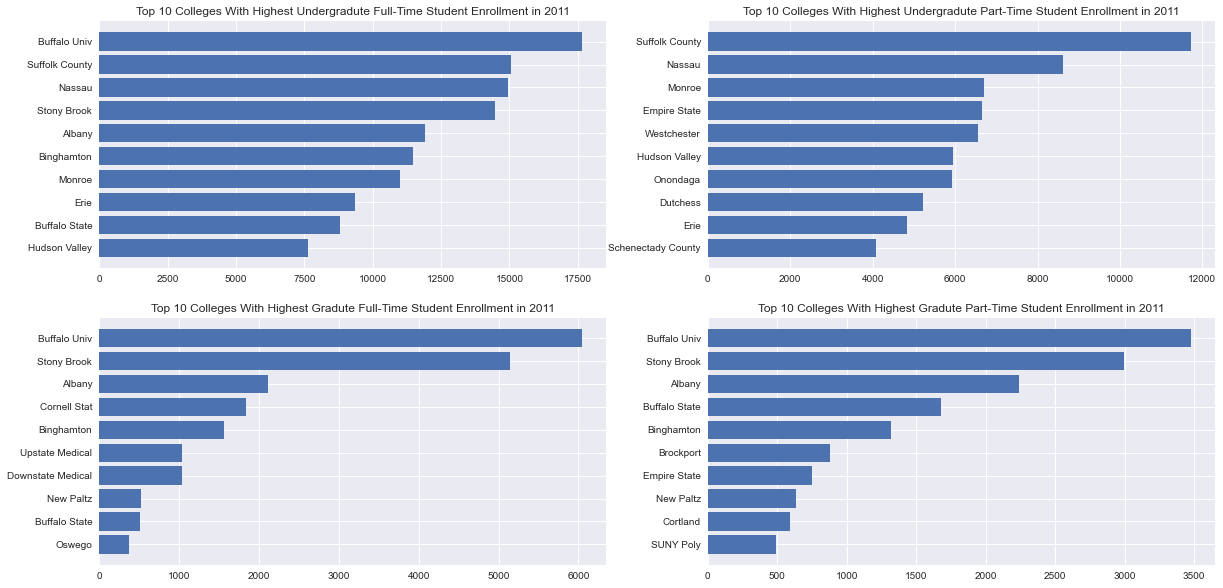

In [784]:
# Creating 4 plots of the top 10 of each column

fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(2, 2, figsize=(20, 10))

ax1.barh(undergrad_full_cn_11, undergrad_full_11)
ax1.set_title('Top 10 Colleges With Highest Undergradute Full-Time Student Enrollment in 2011')

ax2.barh(undergrad_part_cn_11, undergrad_part_11)
ax2.set_title('Top 10 Colleges With Highest Undergradute Part-Time Student Enrollment in 2011')

ax3.barh(grad_full_cn_11, grad_full_11)
ax3.set_title('Top 10 Colleges With Highest Gradute Full-Time Student Enrollment in 2011')

ax4.barh(grad_part_cn_11, grad_part_11)
ax4.set_title('Top 10 Colleges With Highest Gradute Part-Time Student Enrollment in 2011')
plt.show()

---
#### 2. Plotting 2019 data highlights

In [785]:
# Creating necessary variables for plotting 2019 data

undergrad_full_19 = df_2019.sort_values('Undergraduate Full-Time').tail(10)['Undergraduate Full-Time']
undergrad_full_cn_19 = df_2019.sort_values('Undergraduate Full-Time').tail(10)['College or Institution Name']

undergrad_part_19 = df_2019.sort_values('Undergraduate Part-Time').tail(10)['Undergraduate Part-Time']
undergrad_part_cn_19 = df_2019.sort_values('Undergraduate Part-Time').tail(10)['College or Institution Name']

grad_full_19 = df_2019.sort_values('Graduate Full-Time').tail(10)['Graduate Full-Time']
grad_full_cn_19 = df_2019.sort_values('Graduate Full-Time').tail(10)['College or Institution Name']

grad_part_19 = df_2019.sort_values('Graduate Part-Time').tail(10)['Graduate Part-Time']
grad_part_cn_19 = df_2019.sort_values('Graduate Part-Time').tail(10)['College or Institution Name']

In [786]:
# Using 'seaborn' style for plotting

plt.style.use('seaborn')

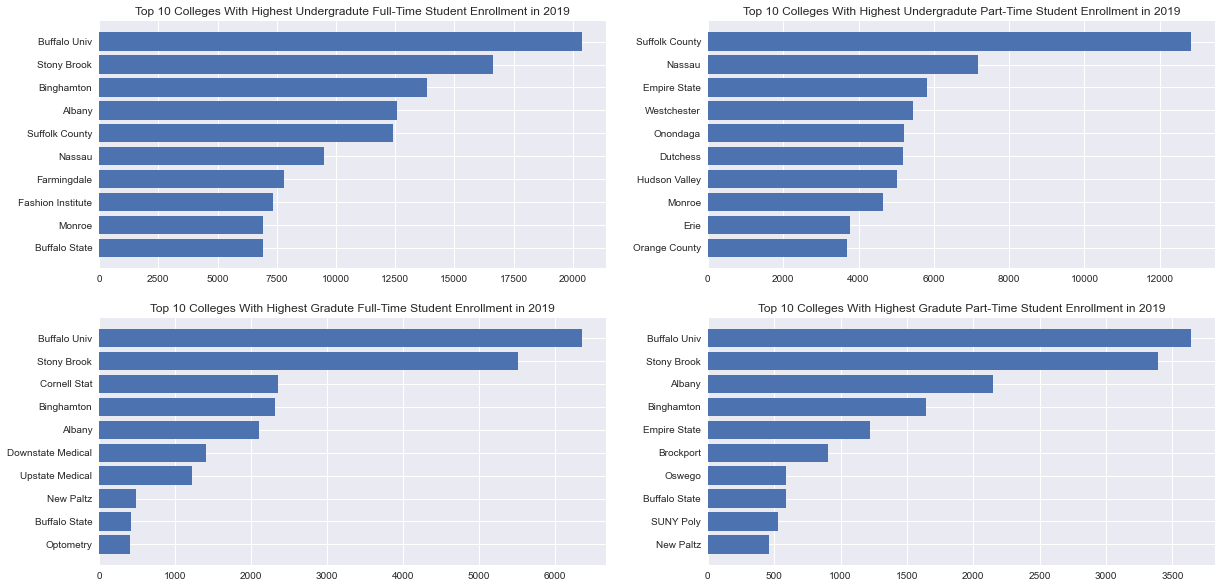

In [787]:
# Creating 4 plots of the top 10 of each column

fig, [[ax5, ax6],[ax7, ax8]] = plt.subplots(2, 2, figsize=(20, 10))

ax5.barh(undergrad_full_cn_19, undergrad_full_19)
ax5.set_title('Top 10 Colleges With Highest Undergradute Full-Time Student Enrollment in 2019')

ax6.barh(undergrad_part_cn_19, undergrad_part_19)
ax6.set_title('Top 10 Colleges With Highest Undergradute Part-Time Student Enrollment in 2019')

ax7.barh(grad_full_cn_19, grad_full_19)
ax7.set_title('Top 10 Colleges With Highest Gradute Full-Time Student Enrollment in 2019')

ax8.barh(grad_part_cn_19, grad_part_19)
ax8.set_title('Top 10 Colleges With Highest Gradute Part-Time Student Enrollment in 2019')
plt.show()

---
#### 3. Plotting 2011-2019 data highlights

In [788]:
# Creating necessary variables for plotting 2011-2019 data

undergrad_full = df.sort_values('Undergraduate Full-Time').tail(10)['Undergraduate Full-Time']
undergrad_full_cn = df.sort_values('Undergraduate Full-Time').tail(10)['College or Institution Name']
undergrad_full_year = df.sort_values('Undergraduate Full-Time').tail(10)['Year']

undergrad_part = df.sort_values('Undergraduate Part-Time').tail(10)['Undergraduate Part-Time']
undergrad_part_cn = df.sort_values('Undergraduate Part-Time').tail(10)['College or Institution Name']
undergrad_part_year = df.sort_values('Undergraduate Part-Time').tail(10)['Year']

grad_full = df.sort_values('Graduate Full-Time').tail(10)['Graduate Full-Time']
grad_full_cn = df.sort_values('Graduate Full-Time').tail(10)['College or Institution Name']
grad_full_year = df.sort_values('Graduate Full-Time').tail(10)['Year']

grad_part = df.sort_values('Graduate Part-Time').tail(10)['Graduate Part-Time']
grad_part_cn = df.sort_values('Graduate Part-Time').tail(10)['College or Institution Name']
grad_full_year = df.sort_values('Graduate Full-Time').tail(10)['Year']

In [789]:
# Using 'seaborn' style for plotting

plt.style.use('seaborn')

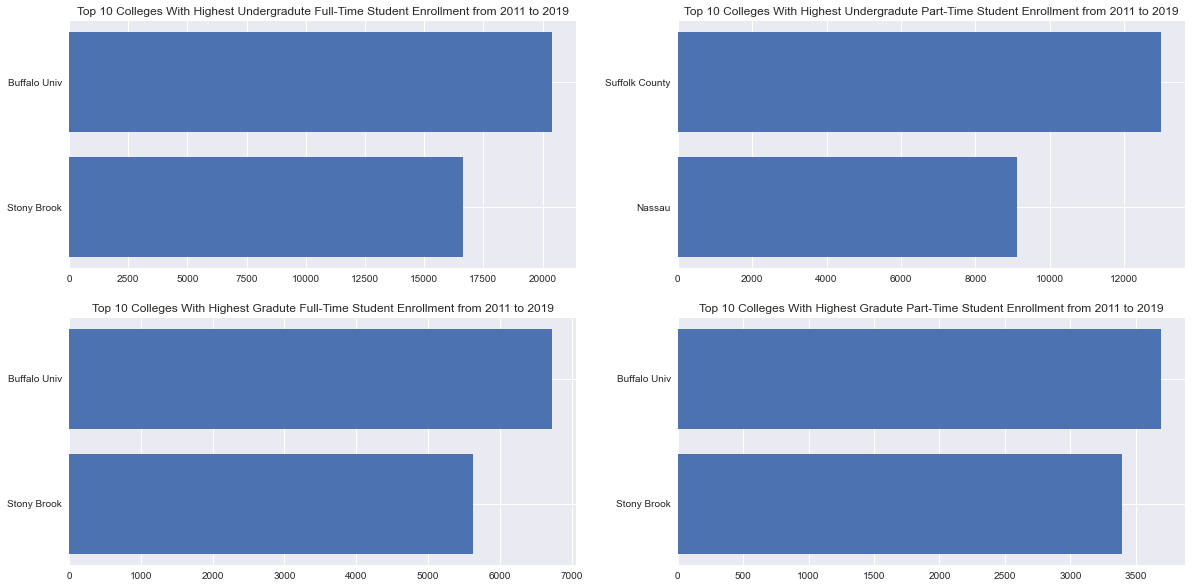

In [790]:
# Creating 4 plots of the top 10 of each column

fig, [[ax9, ax10],[ax11, ax12]] = plt.subplots(2, 2, figsize=(20, 10))

## plotting the top 10 undergrad full-timeers
ax9.barh(undergrad_full_cn, undergrad_full)
ax9.set_title('Top 10 Colleges With Highest Undergradute Full-Time Student Enrollment from 2011 to 2019')

## plotting the top 10 undergrad part-timeers
ax10.barh(undergrad_part_cn, undergrad_part)
ax10.set_title('Top 10 Colleges With Highest Undergradute Part-Time Student Enrollment from 2011 to 2019')

## plotting the top 10 grad full-timeers
ax11.barh(grad_full_cn, grad_full)
ax11.set_title('Top 10 Colleges With Highest Gradute Full-Time Student Enrollment from 2011 to 2019')

## plotting the top 10 grad part-timeers
ax12.barh(grad_part_cn, grad_part)
ax12.set_title('Top 10 Colleges With Highest Gradute Part-Time Student Enrollment from 2011 to 2019')
plt.show()

> * The graphs are supposed to plot 10 bars per graph but looking at it, there seems to be an issue.
> * So i will try to plot one of the dataframes to see what the problem is.

In [791]:
df.sort_values('Undergraduate Full-Time').tail(10)

,entry#,Year,Term,College or Institution Type,College or Institution Name,Undergraduate Full-Time,Undergraduate Part-Time,Graduate Full-Time,Graduate Part-Time
528,477,2019,Fall,Doctoral Degree Granting Institutions,Stony Brook,16622.0,1210.0,5520.0,3391.0
29,80,2011,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,17664.0,1670.0,6048.0,3478.0
109,79,2012,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,17766.0,1893.0,6270.0,3200.0
163,78,2013,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,18091.0,1740.0,6725.0,3294.0
242,77,2014,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,18166.0,1716.0,6422.0,3691.0
284,76,2015,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,18452.0,1501.0,6406.0,3449.0
309,75,2016,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,18824.0,1588.0,6354.0,3418.0
374,74,2017,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,19401.0,1619.0,6306.0,3322.0
439,73,2018,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,19941.0,1671.0,6535.0,3361.0
513,72,2019,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,20401.0,1524.0,6361.0,3641.0


> * From the look of the data frame above i can see that the first 10 rows are dominated by only 2 colleges, Buffalo University and Stony Brook.
> * This means that i have to seperate the data and plot it differently
> * First I will take a look at the remainng data frames to see if it's the same case with the rest

In [792]:
df.sort_values('Undergraduate Part-Time').tail(10)

,entry#,Year,Term,College or Institution Type,College or Institution Name,Undergraduate Full-Time,Undergraduate Part-Time,Graduate Full-Time,Graduate Part-Time
125,348,2013,Fall,Community Colleges,Nassau,14209.0,9109.0,0.0,0.0
119,493,2012,Fall,Community Colleges,Suffolk County,14843.0,11376.0,0.0,0.0
37,494,2011,Fall,Community Colleges,Suffolk County,15064.0,11725.0,0.0,0.0
133,492,2013,Fall,Community Colleges,Suffolk County,14831.0,11880.0,0.0,0.0
252,490,2015,Fall,Community Colleges,Suffolk County,14722.0,12107.0,0.0,0.0
225,491,2014,Fall,Community Colleges,Suffolk County,14318.0,12282.0,0.0,0.0
544,486,2019,Fall,Community Colleges,Suffolk County,12399.0,12831.0,0.0,0.0
419,488,2017,Fall,Community Colleges,Suffolk County,13867.0,12889.0,0.0,0.0
430,487,2018,Fall,Community Colleges,Suffolk County,13187.0,12891.0,0.0,0.0
327,489,2016,Fall,Community Colleges,Suffolk County,14084.0,12982.0,0.0,0.0


In [793]:
df.sort_values('Graduate Full-Time').tail(10)

,entry#,Year,Term,College or Institution Type,College or Institution Name,Undergraduate Full-Time,Undergraduate Part-Time,Graduate Full-Time,Graduate Part-Time
386,479,2017,Fall,Doctoral Degree Granting Institutions,Stony Brook,16142.0,1151.0,5621.0,3042.0
29,80,2011,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,17664.0,1670.0,6048.0,3478.0
109,79,2012,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,17766.0,1893.0,6270.0,3200.0
374,74,2017,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,19401.0,1619.0,6306.0,3322.0
309,75,2016,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,18824.0,1588.0,6354.0,3418.0
513,72,2019,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,20401.0,1524.0,6361.0,3641.0
284,76,2015,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,18452.0,1501.0,6406.0,3449.0
242,77,2014,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,18166.0,1716.0,6422.0,3691.0
439,73,2018,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,19941.0,1671.0,6535.0,3361.0
163,78,2013,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,18091.0,1740.0,6725.0,3294.0


In [794]:
df.sort_values('Graduate Part-Time').tail(10)

,entry#,Year,Term,College or Institution Type,College or Institution Name,Undergraduate Full-Time,Undergraduate Part-Time,Graduate Full-Time,Graduate Part-Time
329,480,2016,Fall,Doctoral Degree Granting Institutions,Stony Brook,15769.0,1167.0,5442.0,3305.0
374,74,2017,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,19401.0,1619.0,6306.0,3322.0
429,478,2018,Fall,Doctoral Degree Granting Institutions,Stony Brook,16293.0,1181.0,5416.0,3346.0
439,73,2018,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,19941.0,1671.0,6535.0,3361.0
528,477,2019,Fall,Doctoral Degree Granting Institutions,Stony Brook,16622.0,1210.0,5520.0,3391.0
309,75,2016,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,18824.0,1588.0,6354.0,3418.0
284,76,2015,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,18452.0,1501.0,6406.0,3449.0
29,80,2011,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,17664.0,1670.0,6048.0,3478.0
513,72,2019,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,20401.0,1524.0,6361.0,3641.0
242,77,2014,Fall,Doctoral Degree Granting Institutions,Buffalo Univ,18166.0,1716.0,6422.0,3691.0


> * After making sure that the problem is consistent with the remaining data, I took a different approach.
> * I used the 'set_ticks' and 'set_ticklabels' attributes of 'ax' along with a for loop to force the plotting of each bar at a time.
> * Now since I am plotting in a horizantel bar charts, i used 'set_yticks()' and 'set_yticklabels()'

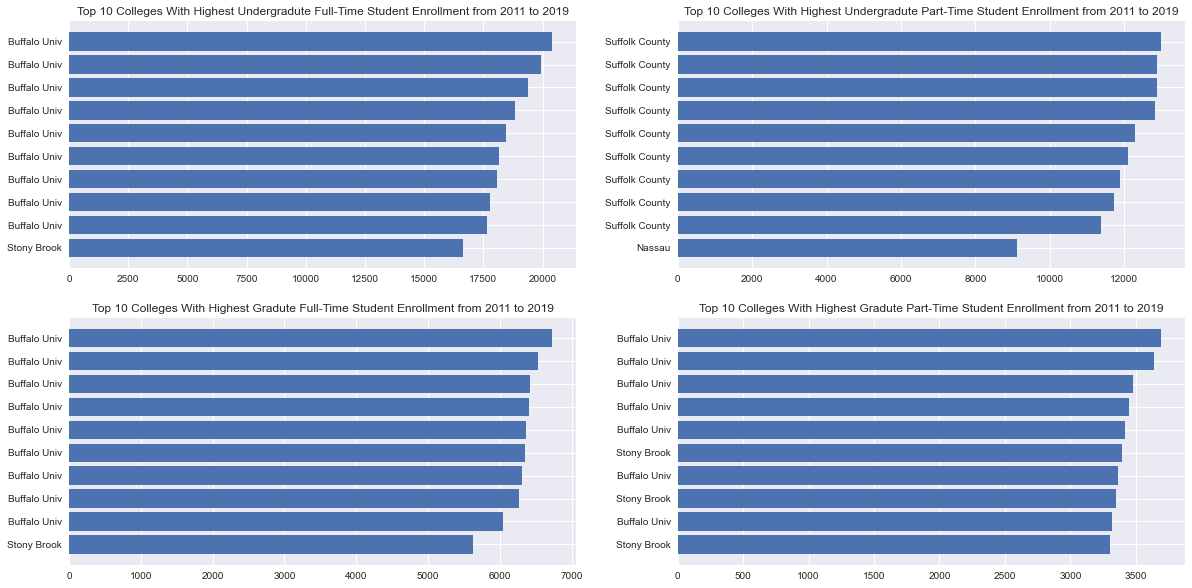

In [795]:
## recreating the 4 bar charts
fig, [[ax9, ax10],[ax11, ax12]] = plt.subplots(2, 2, figsize=(20, 10))

## I was getting a fixed locater warning that i was unable to figure out. 
## althougt it was not affecting the plot, it was very annoying.
## I imported warnings and filtered it out.
import warnings
warnings.filterwarnings('ignore')


## plotting the top 10 undergrad full-timeers
undergrad_full_cn_x = [i for i in range(len(undergrad_full_cn))]
ax9.barh(undergrad_full_cn_x, undergrad_full)
ax9.set_title('Top 10 Colleges With Highest Undergradute Full-Time Student Enrollment from 2011 to 2019')
ax9.set_yticklabels(undergrad_full_cn)
ax9.set_yticks(undergrad_full_cn_x)


## plotting the top 10 undergrad part-timeers
undergrad_part_cn_x = [i for i in range(len(undergrad_part_cn))]
ax10.barh(undergrad_part_cn_x, undergrad_part)
ax10.set_title('Top 10 Colleges With Highest Undergradute Part-Time Student Enrollment from 2011 to 2019')
ax10.set_yticklabels(undergrad_part_cn)
ax10.set_yticks(undergrad_part_cn_x)


## plotting the top 10 grad full-timeers
grad_full_cn_x = [i for i in range(len(grad_full_cn))]
ax11.barh(grad_full_cn_x, grad_full)
ax11.set_title('Top 10 Colleges With Highest Gradute Full-Time Student Enrollment from 2011 to 2019')
ax11.set_yticklabels(grad_full_cn)
ax11.set_yticks(grad_full_cn_x)


## plotting the top 10 grad part-timeers
grad_part_cn_x = [i for i in range(len(grad_part_cn))]
ax12.barh(grad_part_cn_x, grad_part)
ax12.set_title('Top 10 Colleges With Highest Gradute Part-Time Student Enrollment from 2011 to 2019')
ax12.set_yticklabels(grad_part_cn)
ax12.set_yticks(grad_part_cn_x)


plt.show()

> * That looks a lot better.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Part 5: Final Report

#### 1. In the first year (2011):

> * Highest Number of Undergradute Full-Time Students in 2011 is `17664` and that was in `Buffalo University Doctoral Degree Granting Institutions`.
> * Highest Number of Undergradute Part-Time Students in 2011 is `11725` and that was in `Suffolk County Community Colleges`.
> * Highest Number of Gradute Full-Time Students in 2011 is `6048` and that was in `Buffalo University Doctoral Degree Granting Institutions`.
> * Highest Number of Gradute Part-Time Students in 2011 is `3478` and that was in `Buffalo University Doctoral Degree Granting Institutions`.

> * Lowest Number (not a 0) of Undergradute Full-Time Students in 2011 is `184` and that was in `Downstate Medical Doctoral Degree Granting Institutions`.
> * Lowest Number (not a 0) of Undergradute Part-Time Students in 2011 is `17` and that was in `Alfred-Ceramics Doctoral Degree Granting Institutions`.
> * Lowest Number (not a 0) of Gradute Full-Time Students in 2011 is `71` and that was in `Alfred-Ceramics Doctoral Degree Granting Institutions`.
> * Lowest Number (not a 0) of Gradute Part-Time Students in 2011 is `2` and that was in `Optometry Doctoral Degree Granting Institutions`.


#### 2. In the last year (2019):

> * Highest Number of Undergradute Full-Time Students in 2019 is `20401` and that was in `Buffalo Univ Doctoral Degree Granting Institutions`.
> * Highest Number of Undergradute Part-Time Students in 2019 is `12831` and that was in `Suffolk County Community Colleges`.
> * Highest Number of Gradute Full-Time Students in 2019 is `6361` and that was in `Buffalo Univ Doctoral Degree Granting Institutions`.
> * Highest Number of Gradute Part-Time Students in 2019 is `3641` and that was in `Buffalo Univ Doctoral Degree Granting Institutions`.

> * Lowest Number (not a 0) of Undergradute Full-Time Students in 2019 is `153` and that was in `Upstate Medical Doctoral Degree Granting Institutions`.
> * Lowest Number (not a 0) of Undergradute Part-Time Students in 2019 is `1` and that was in `Cornell Stat Doctoral Degree Granting Institutions`.
> * Lowest Number (not a 0) of Gradute Full-Time Students in 2019 is `10` and that was in `Delhi Technology Colleges`.
> * Lowest Number (not a 0) of Gradute Part-Time Students in 2019 is `9` and that was in `Purchase Comprehensive Colleges`.

#### 3. In the period from 2011-2019:

> * Highest Number of Undergradute Full-Time Students in the period between 2011 and 2019 is `20401`
> * That was in the year `2019` in `Buffalo University`.
> * The entry in the csv file is `row number 72`

> * Highest Number of Undergradute Part-Time Students in the period between 2011 and 2019 is `12982`
> * That was in the year `2016` in `Suffolk County Community College`.
> * The entry in the csv file is `row number 489`

> * Highest Number of Gradute Full-Time Students in the period between 2011 and 2019 is `6725`
> * That was in the year `2013` in `Buffalo University`.
> * The entry in the csv file is `row number 78`

> * Highest Number of Gradute Part-Time Students in the period between 2011 and 2019 is `3691`
> * That was in the year `2014` in `Buffalo University`
> * The entry in the csv file is `row number 77`


> * Lowest Number (not a 0) of Undergradute Full-Time Students in the period between 2011 and 2019 is `153`
> * That was in the year `2019` in `SUNY Upstate Medical University`.
> * The entry in the csv file is `row number 531`

> * Lowest Number (not a 0) of Undergradute Part-Time Students in the period between 2011 and 2019 is `1`
> * That was in the year `2019` in `Cornell State University`.
> * The entry in the csv file is `row number 126`

> * Lowest Number (not a 0) of Gradute Full-Time Students in the period between 2011 and 2019 is `1`
> * That was in the year `2015` in `SUNY Delhi`.
> * The entry in the csv file is `row number 157`

> * Lowest Number (not a 0) of Gradute part-Time Students in the period between 2011 and 2019 is `1`
> * That was in the year `2017` in `SUNY College of Optometry`.
> * The entry in the csv file is `row number 407`

#### 4. Major bottlenecks on this project

> * plotting the highlights and figuring out how the setticks and setticklabels work was kind of a bottleneck for me. also i didn't use seaborn but i will need to look into it later

#### 5. what you enjoyed most and something you didn't like much.

> * The whole project was really enjoyable. Plotting was the most enjoyable part because in the beginning I didn't know that Python was really that great at data visualization but apparently there is a lot you can do with it in that aspect.

#### 6. Any recommendation to the professor for future students

> * Diving deep into data visualization and maybe encouraging students to use other programs and implemnt their work from there into the existing project

#### 7. Any future plan with this project

> * I think i will use this project as a reminder and a reference to my future work especially using pandas and numpy

#### 8. References

> * https://numpy.org/doc/stable/numpy-user.pdf
> * https://pandas.pydata.org/docs/user_guide/index.html#user-guide
> * http://catalog.data.gov/
> * https://stackoverflow.com/questions/54388670/how-to-make-a-plot-with-repeating-labels-on-x-axis
> * https://stackoverflow.com/questions/40918922/set-tick-labels-in-matplotlib